# 1. Digits 데이터
## (1)필요한 모듈 import

In [7]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## (2) 데이터 준비


In [3]:
digits = load_digits()

## (3) 데이터 이해하기

In [28]:
digits_data = digits.data #feature data
digits_label = digits.target #label data


In [34]:
digits.target_names #label : 숫자 0~9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
digits_df = pd.DataFrame(data=digits_data,columns=digits.feature_names)

digits_df["label"] = digits.target #레이블 병합
digits_df.shape



(1797, 65)

In [21]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [35]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [38]:
digits_df['label'].value_counts()
#데이터가 balnce함


3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

## (4) train, test데이터 분리

In [18]:

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=123)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## (5) 다양한 모델로 학습시켜보기, (6) 모델을 평가해보기

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy
#digits 데이터가 balance한 데이터기 때문에 accuracy를 사용하였다.

0.8305555555555556

<AxesSubplot:>

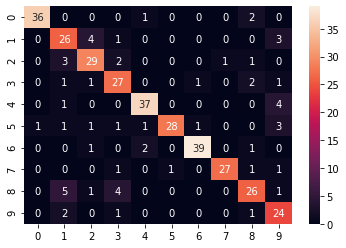

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#confusion matrix를 heatmap으로 나타내기
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot = True)

In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)


In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

<AxesSubplot:>

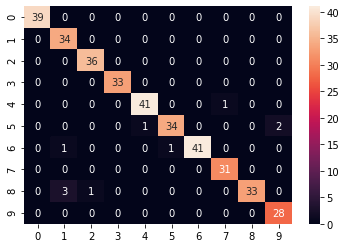

In [71]:
#confusion matrix를 heatmap으로 나타내기
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot = True)

In [72]:
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9888888888888889

<AxesSubplot:>

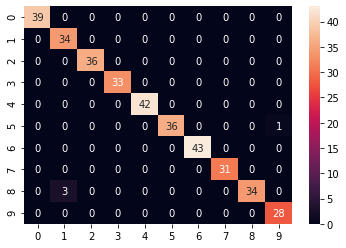

In [74]:
#confusion matrix를 heatmap으로 나타내기
cm3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm3, annot = True)

In [75]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9611111111111111

<AxesSubplot:>

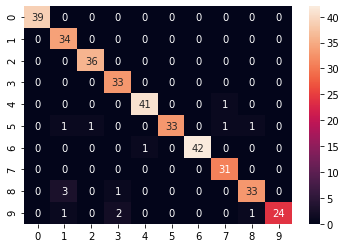

In [77]:
#confusion matrix를 heatmap으로 나타내기
cm4 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm4, annot = True)

In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

/Users/kyungmo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9694444444444444

<AxesSubplot:>

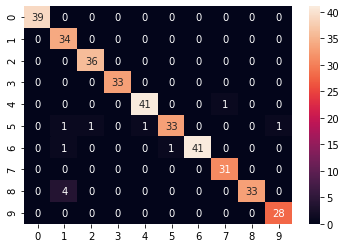

In [80]:
#confusion matrix를 heatmap으로 나타내기
cm5 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm5, annot = True)

# 2. wine data

## (1) 필요한 모듈 import하기

In [82]:
from sklearn.datasets import load_wine

## (2) 데이터 준비

In [94]:
wine = load_wine()

## (3) 데이터 이해하기

In [95]:
wine_data = wine.data #feature data
wine_label = wine.target #label data

In [97]:
wine.target_names #wine label : 0, 1, 2

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [99]:
wine_df = pd.DataFrame(data=wine_data,columns=wine.feature_names)
#데이터를 판다스 데이터프레임으로
wine_df["label"] = wine.target #레이블 병합
wine_df.shape



(178, 14)

In [100]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [101]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [104]:
wine_df['label'].value_counts()
#데이터가 unbalnce함


1    71
0    59
2    48
Name: label, dtype: int64

## (4) train, test 데이터 분리

In [105]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=123)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


## (5) 다양한 모델로 학습시켜보기, (6) 모델을 평가해보기

In [106]:
#Decision Tree
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [113]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')
#imbalnce한 데이터이기 때문에 f1_score를 사용하였다.

0.9722222222222222

<AxesSubplot:>

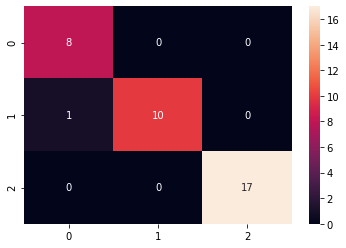

In [114]:
cm6 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm6, annot = True)

In [115]:
#Random Forest

random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

In [116]:
f1_score(y_test, y_pred, average='micro')
#imbalnce한 데이터이기 때문에 f1_score를 사용하였다.

1.0

<AxesSubplot:>

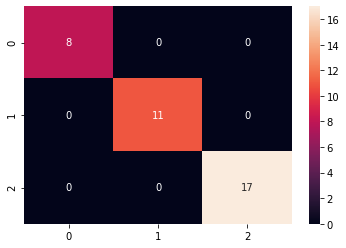

In [117]:
cm7 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm7, annot = True)

In [118]:
# SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [120]:
f1_score(y_test, y_pred, average='micro')
#imbalnce한 데이터이기 때문에 f1_score를 사용하였다.

0.5

<AxesSubplot:>

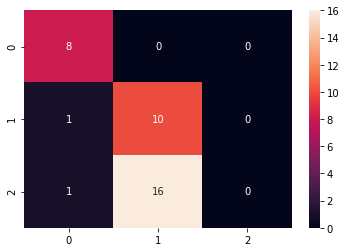

In [121]:
cm8 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm8, annot = True)

In [122]:
#SGD
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

In [123]:
f1_score(y_test, y_pred, average='micro')
#imbalnce한 데이터이기 때문에 f1_score를 사용하였다.

0.75

<AxesSubplot:>

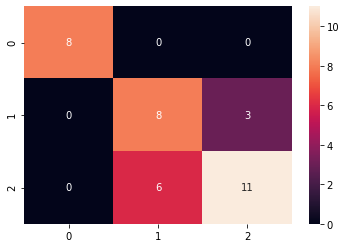

In [125]:
cm9 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm9, annot = True)

In [126]:
#Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

/Users/kyungmo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [135]:
f1_score(y_test, y_pred, average='micro')
#imbalnce한 데이터이기 때문에 f1_score를 사용하였다.


1.0

<AxesSubplot:>

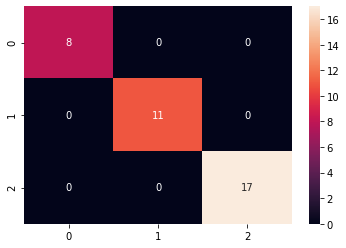

In [128]:

cm10 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm10, annot = True)

# 3. breast_cancer 데이터

## (1) 필요한 모듈 import하기

In [129]:
from sklearn.datasets import load_breast_cancer

## (2) 데이터 준비

In [130]:
cancer = load_breast_cancer()

## (3) 데이터 이해하기

In [164]:
cancer_data = cancer.data
cancer_label = cancer.target


In [165]:
cancer.target_names # 악성종양(암), 양성종양(X)

array(['malignant', 'benign'], dtype='<U9')

In [139]:
cancer_df = pd.DataFrame(data=cancer_data,columns=cancer.feature_names)
#데이터를 판다스 데이터프레임으로
cancer_df["label"] = cancer.target
cancer_df.shape


(569, 31)

In [140]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [143]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [145]:
cancer_df["label"].value_counts()
#데이터가 unbalance함, 0:악성, 1:양성


1    357
0    212
Name: label, dtype: int64

## (4) train, test데이터 분리

In [147]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=123)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


## (5) 다양한 모델로 학습시켜보기, (6) 모델을 평가해보기

In [148]:
#Decision Tree

decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [151]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall
#imbalance한 데이터이고, 악성종양을 양성종양으로 판별하면 안되기 때문에 recall로 평가해야 한단.

0.9726027397260274

<AxesSubplot:>

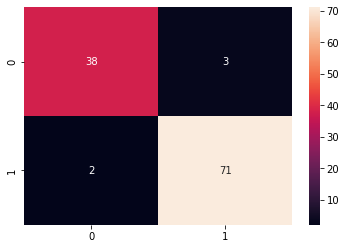

In [152]:
cm11 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm11, annot = True)

In [153]:
#Random Forest


random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)


In [154]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall
#imbalance한 데이터이고, 악성종양을 양성종양으로 판별하면 안되기 때문에 recall로 평가해야 한단.

1.0

<AxesSubplot:>

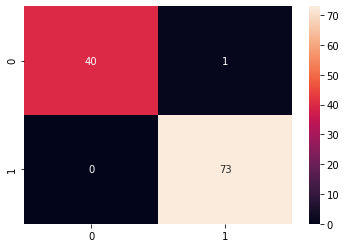

In [155]:
cm12 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm12, annot = True)

In [157]:
# SVM

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [158]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall
#imbalance한 데이터이고, 악성종양을 양성종양으로 판별하면 안되기 때문에 recall로 평가해야 한단.

1.0

<AxesSubplot:>

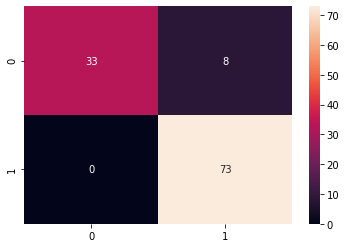

In [159]:
cm13 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm13, annot = True)

In [160]:
#SGD

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

In [161]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall
#imbalance한 데이터이고, 악성종양을 양성종양으로 판별하면 안되기 때문에 recall로 평가해야 한단.

0.9178082191780822

<AxesSubplot:>

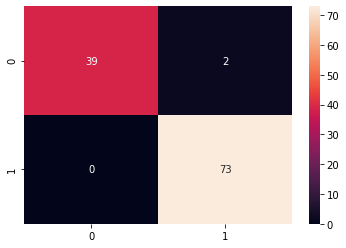

In [168]:
cm14 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm14, annot = True)

In [166]:
#Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

/Users/kyungmo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall
#imbalance한 데이터이고, 악성종양을 양성종양으로 판별하면 안되기 때문에 recall로 평가해야 한단.

1.0

<AxesSubplot:>

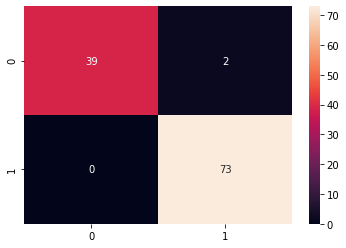

In [169]:
cm15 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm15, annot = True)

## 회고

이번 프로젝트에서 어려웠던건 데이터 이해하기 단계인것 같다.
아직 판다스 사용법이 익숙하지 않아서 데이터 파악과 전처리를 위해 웹서핑을 하면서 판다스 사용법을 다시금 익혔다.  또한 다른 데이터로 연습했을때는 csv파일을 바로 데이터프레임으로 변환하여 읽어왔는데, 이번엔 사이킷런의 내장 데이터였기 때문에 데이터프레임을 다시 만드는 과정이 약간 헷갈렸던것 같다.
기존 노드에서 내가 새롭게 추가 해본것은 히트맵이다. 2x2 혼동행렬의 경우 그냥 나타내도 깔끔하게 읽을 수 있지만, 그 이상으로 숫자가 커질경우 한눈에 보기가 어려워 히트맵으로 작성해 보았다.
이번 노드를 통해 사이킷런을 이용한 데이터 전처리 과정과 기본적인 머신러닝 알고리즘에 대해 알 수 있었다. 조금 모호했던것은 머신러닝 알고리즘의 원리와 수식, 하이퍼 파라미터에 대해 자세히는 알지 못한것 같아 아쉬웠다.
이 사항에 대해 스스로 웹서핑을 통해 다시금 정리해봐야겠다.
이번 노드가  첫번째 익스노드보다는 무난히 수행했지만, 스스로 1부터 100까지 다 하라고 하면 잘 못할것 같다는 생각이다. 앞의 코드를 보지 않고 스스로 작성하는 연습을 많이 해야겠다